<a href="https://colab.research.google.com/github/fathiUsman/Customer-Personality-Analysis/blob/main/CustPersnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER PERSONALITY ANALYSIS WITH PYTHON**

Analysis of company's ideal customers

## **CONTEXT**


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



# **CONTENT**

**Attributes**

**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in 2 years

MntFruits: Amount spent on fruits in 2 years

MntMeatProducts: Amount spent on meat in 2 years

MntFishProducts: Amount spent on fish in 2 years

MntSweetProducts: Amount spent on sweets in 2 years

MntGoldProds: Amount spent on gold in  2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month


**TARGET**

Here I will be using a dataset that contains data collected from a marketing campaign from 2012-2014, where the task is to predict how different customer segments will respond for a particular product or service.

#Import all the libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read the dataset
data=pd.read_csv('/content/drive/MyDrive/finalproject/marketing_campaign - marketing_campaign (1).csv')

In [ ]:
# First 5 rows of the dataset
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#size of the dataset
data.shape

(2240, 29)

In [ ]:
#information of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
# create a column as Children by adding both kids and teens at home.

data['Children']=data['Kidhome']+data['Teenhome']


In [ ]:
data.Children

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

In [ ]:
#Create column 'Spending' by adding all the products ,to find the total expenditure by customers

data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data.Spending

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spending, Length: 2240, dtype: int64

In [ ]:
# Rename the columns 
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


To convert year of birth to Age (as of 2014)

Subtract the year of birth from the present year

In [ ]:

data['Age']=2014-data['Year_Birth']
data.Age

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [ ]:
#Rename the columns
data=data.rename(columns={'NumDealsPurchases':'DealPurchases','NumWebPurchases': "WebPurchases",'NumCatalogPurchases':'CatalogPurchases','NumStorePurchases':'StorePurchases'})

**To find the seniority**

Steps:


*   dataframe created with the date of customer enrolled to the company
*   Calculated number of days from when the customer is enrolled till the present date


*   Converted the days into months 






In [ ]:
last_date = date(2014,10, 4)

In [ ]:
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data.Seniority

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Seniority, Length: 2240, dtype: datetime64[ns]

In [ ]:
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

In [ ]:
data.Seniority

0       25.333333
1        7.000000
2       13.633333
3        7.866667
4        8.600000
          ...    
2235    15.933333
2236     3.866667
2237     8.400000
2238     8.433333
2239    23.966667
Name: Seniority, Length: 2240, dtype: float64

In [ ]:
#dataframe with important column
data1=data
data1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Spending,Age,Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1617,57,25.333333
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,27,60,7.000000
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,776,49,13.633333
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,53,30,7.866667
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,422,33,8.600000


In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Spending,Age,Seniority
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214,45.194196,15.019405
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288,11.984069,6.737417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,18.000000,3.233333
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,37.000000,9.258333
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,44.000000,15.083333
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,55.000000,20.866667
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,121.000000,26.533333


In [ ]:
data1.drop(['Kidhome','Teenhome','Complain','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
data1['Income'].value_counts()

7500.0     12
35860.0     4
18929.0     3
34176.0     3
48432.0     3
           ..
71022.0     1
30675.0     1
30168.0     1
19656.0     1
41728.0     1
Name: Income, Length: 1974, dtype: int64

**Outliners**

Finally I will detect and Remove the Outliers in the data set

I will use Box plot to find the outliners as if there is an outlier it will be plotted as point in boxplot but other population will be grouped together and display as boxes.

Text(0.5, 1.0, 'Seniority Distribution')

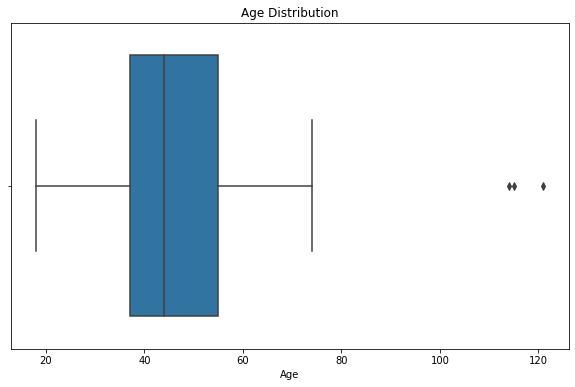

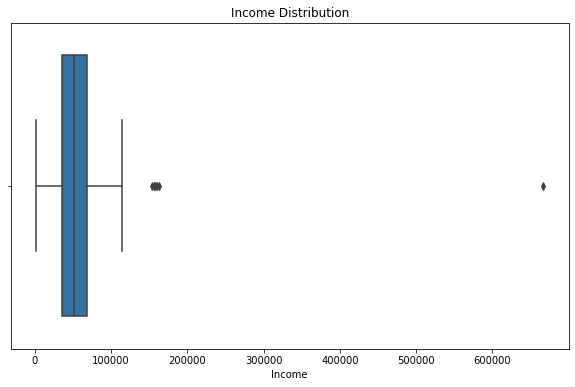

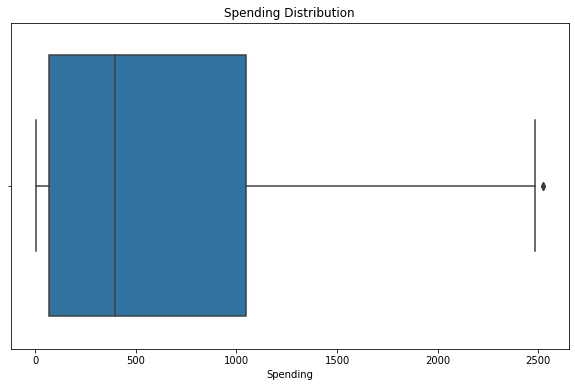

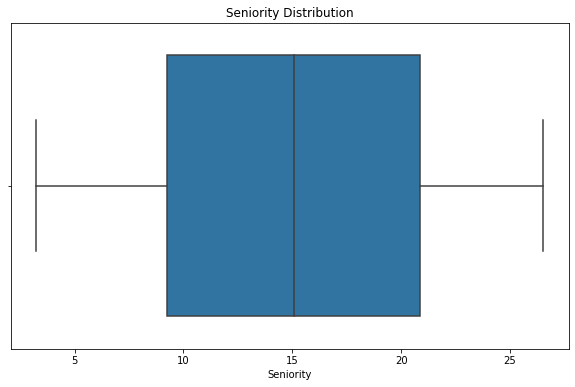

In [ ]:
# Creating Box Plot for Age
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data['Age'],orient='v')
plt.title('Age Distribution')

# Creating Box Plot for Income
plt.figure(figsize=(10,6))
sns.boxplot(data['Income'],orient='v')
plt.title('Income Distribution')

# Creating Box Plot for Spending
plt.figure(figsize=(10,6))
sns.boxplot(data['Spending'],orient='v')
plt.title('Spending Distribution')

# Creating Box Plot for Seniority
plt.figure(figsize=(10,6))
sns.boxplot(data['Seniority'],orient='v')
plt.title('Seniority Distribution')


The plots shows :

Age: Above 100 are outliers

Income: 100k-200k and > 600k. I will remove only the >600k because some of the customers earn 100k-200k

Spending: > 2500. I will not remove this as there were actual spending more than 2500

In [ ]:
#find any null values

data1.isnull().sum()

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Dt_Customer           0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
DealPurchases         0
WebPurchases          0
CatalogPurchases      0
StorePurchases        0
NumWebVisitsMonth     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Response              0
Children              0
Spending              0
Age                   0
Seniority             0
dtype: int64

In [ ]:
# delete outliners
data1=data1[data1['Income']<600000]

In [ ]:
#fill the null values

data1['Income'] = data1['Income'].fillna(data1['Income'].mean())

In [ ]:
data1.isnull().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Dt_Customer          0
Recency              0
Wines                0
Fruits               0
Meat                 0
Fish                 0
Sweets               0
Gold                 0
DealPurchases        0
WebPurchases         0
CatalogPurchases     0
StorePurchases       0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Response             0
Children             0
Spending             0
Age                  0
Seniority            0
dtype: int64

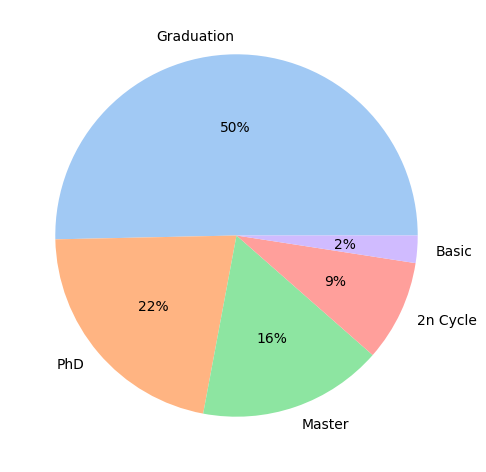

In [ ]:
# plot a pie-chart for finding education of customers

plt.figure(figsize=(8, 6), dpi=100)

plt.pie(data1['Education'].value_counts(),labels= data1['Education'].value_counts().index,colors = sns.color_palette('pastel')[0:5],autopct='%.0f%%') 
plt.show()

**Insights:**

From the above pie chart,

We can conclude that 50% of the customers are graduated.

22% customers have done PhD

17% customers with Master degrees.


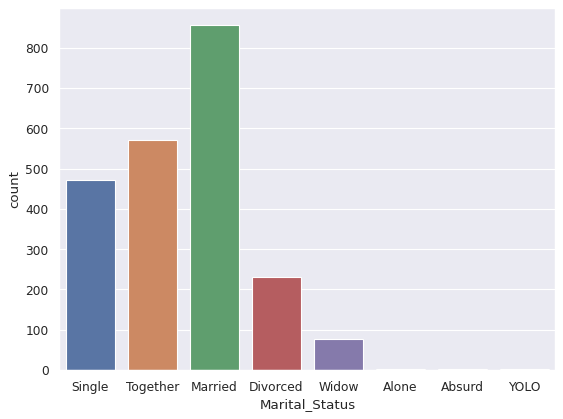

In [ ]:
#Plot a graph to find the marital status of the customers

plt.figure(figsize=(8, 6), dpi=80)

sns.set_theme(style = 'darkgrid')
sns.countplot(x = data1['Marital_Status'])

plt.show()


**Insights:**

In the above graph,

The customers who visit the market most are married ,above 800.

Customers who are living together are approx 600.

single customers are between 400-500

Divorced are between 200-250 

**Does the income increase as the age is more?**

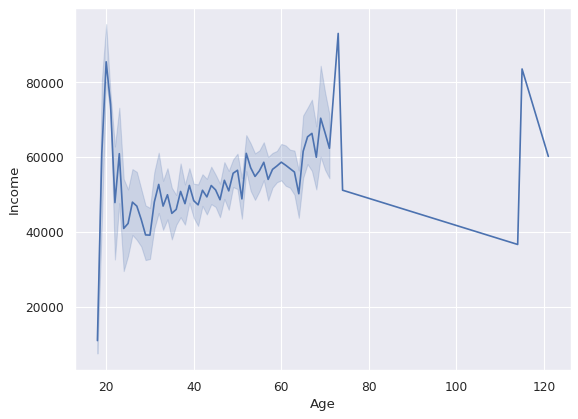

In [ ]:
# Plot a graph for Age and Income of the customers.

plt.figure(figsize=(8, 6), dpi=80)

sns.lineplot(data=data1, x="Age", y="Income")
plt.show()

**Insights:**

In the above graph,

Customers with Age group of 60-80 years have the highest income compared to all other age groups



**Check if the income depends on the education.**

**Does the customers with higher education has more income?**

In [ ]:

Edu_Inc=data1.groupby(['Education'])[('Income')].mean()
Edu_Inc_data=pd.DataFrame(data=Edu_Inc)
Edu_Inc=Edu_Inc_data.sort_values(by=('Income'),ascending=False,axis=0)
Edu_Inc

,Income
Education,
PhD,56145.313929
Master,52917.534247
Graduation,52169.749776
2n Cycle,47633.190000
Basic,20306.259259


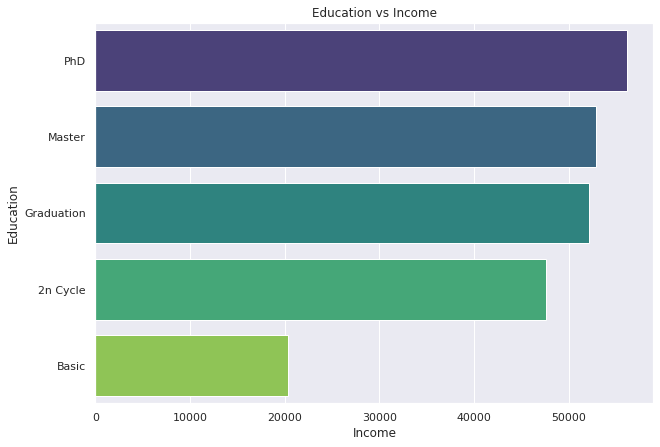

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Education vs Income')
sns.barplot(x=('Income'),y=Edu_Inc.index,data=Edu_Inc,palette='viridis')
plt.show()

**Insights:**

As per the graph,

Yes,The customers with higher education i.e PhD has higher income.
Masters and Graduates have better income compared to under graduates.



**Who has more income.Couple or single?**

In [ ]:
Mar_Inc=data1.groupby(['Marital_Status'])[('Income')].mean()
Mar_Inc_data=pd.DataFrame(data=Mar_Inc)
Mar_Inc=Mar_Inc_data.sort_values(by=('Income'),ascending=False,axis=0)
Mar_Inc

,Income
Marital_Status,
Absurd,72365.500000
Widow,56481.552632
Divorced,52834.228448
Together,52173.120629
Married,51724.978996
Single,50995.350318
YOLO,48432.000000
Alone,43789.000000


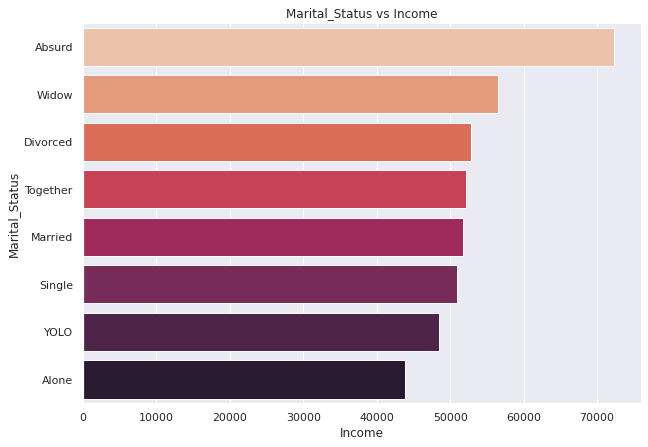

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Marital_Status vs Income')
sns.barplot(x=('Income'),y=Mar_Inc.index,data=Mar_Inc,palette='rocket_r')
plt.show()


**Insight:**

According to the graph plotted,Absurds are having higher income compared to all other marital status.



In [ ]:
# plot a graph to find which category of customers has more children

import plotly.express as px

fig = px.bar(data1, x='Marital_Status', y='Children')
fig.show()

**Insights:**

From the above graph,We can clearly see that married couple have more children.

About 50% of the customers have only one child.

**Which customers spend more in the market?**

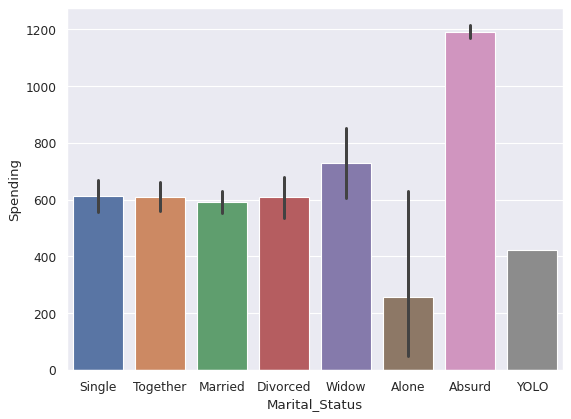

In [ ]:
plt.figure(figsize=(8, 6),dpi=80)

sns.barplot(data=data1, x="Marital_Status", y="Spending")
plt.show()

**Insight:**

From our graph,we can see that absurd customers spend more in the market.

## **Average spendings by children**

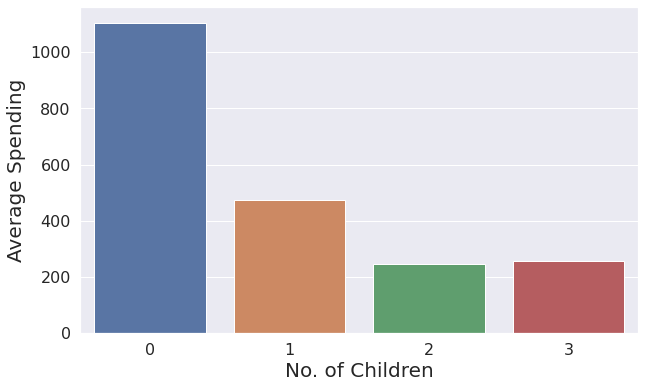

In [ ]:
children_spending = data1.groupby('Children')['Spending'].mean().sort_values(ascending=False)
children_spending_data = pd.DataFrame(list(children_spending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,6))

sns.barplot(data=children_spending_data,  x="No. of Children", y="Average Spending")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20)
plt.ylabel('Average Spending', fontsize=20)
plt.show()

**Insights:**

Customers who don't have any children at home spent higher than the customers having 1 children.

The customers having 1 children are spending higher than the customers having 2 and 3 children.

**What is average Income based on their age?**

In [ ]:
age_df = data1.groupby(by = ['Age']).agg({'Income':'mean'}).reset_index()
age_df.head()

,Age,Income
0,18,10960.500000
1,19,60937.000000
2,20,85449.333333
3,21,74139.800000
4,22,47830.153846


In [ ]:
plt= px.bar(age_df, x = 'Age', y = 'Income')
plt.update_layout(height=400, width=700, title_text="Age Vs Average Income")
plt.show()

**Insights:**

73 year old customer has an average income of 93.02k

At the age of 20 ,another customer earns an average income of 85.45k

Age group 30-70 has an average income of 67k

**Let's find which are the most bought products.**

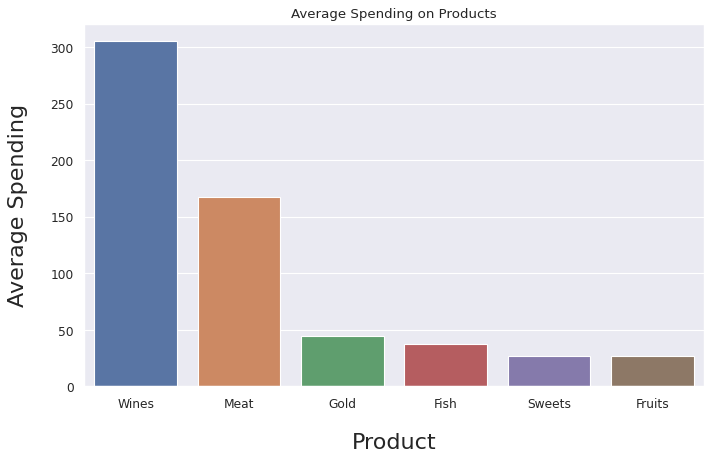

In [ ]:
import matplotlib.pyplot as plt
products = data1[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(10,6),dpi=80)
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)
plt.show()

**Insights:**

From the graph,we can find that customers spent more on wine compared to other products.

Next the meat product is purchased the most.

**Which Age group spend more on wine?**

In [ ]:
plt = px.scatter(data1, x="Age", y="Wines",labels={
                     "Age": "Age",
                     "Wines": "Amount Spent on Wine"                 
                 }, color = 'Wines',title='Amount spent on wine in last 2 years by Age')
plt.show()

**Insights:**

Age group 40-60 spend more amount on wine.

Age group 20-40 spend more on wine compared to customers above 60 years.


**Let's find how people find purchases suitable according to convenience, Based on age**

**('NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth') **

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
 # We will create function which will give us list of corresponding interval to Age column in dataframe,
    # So that we will analyze data based on the interval of age
    
def create_interval_column(age_df, interval):
    inter = []
    interval = interval
    j = 0
    while (j<100):
        j = j + interval
        inter.append(j)
    interval_column = [] 
    for i in age_df['Year_Birth']:
        for j in range(len(inter)-1):
            if inter[j]<i <=inter[j+1]:
                interval_column.append(str(inter[j]) + '-' + str(inter[j+1]))
                break
    return interval_column

In [ ]:
# aggregation of columns to be analysed are calculated and grouped.

interval_to_plot = 10 

columns_to_be_analyzed = ['DealPurchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth']

age_df = data.groupby(by = ['Year_Birth']).agg({'DealPurchases':'sum','WebPurchases':'sum' ,'CatalogPurchases':'sum',
                                              'StorePurchases':'sum', 'NumWebVisitsMonth':'sum' }).reset_index()

In [ ]:
#finding present age of customers from the birth year and the year of marketing analysis done in 2014
#drop 3 rows to keep length same

age_df['Year_Birth'] = 2014 - age_df['Year_Birth'] 
age_df.drop([0,1,2], axis = 0, inplace=True)

In [ ]:
interval_column = create_interval_column(age_df, interval=interval_to_plot )# Creating interval of 5


In [ ]:
age_df['Interval_column'] = interval_column

In [ ]:
# plot a graph for columns analysed based on age
 
plt = make_subplots(rows = 2, cols = 3, subplot_titles=columns_to_be_analyzed)
count = 0
for i in range(2):
    for j in range(3):
        if count == 5 :
          break
        plt.add_trace(go.Bar(x = age_df['Interval_column'].to_numpy(), 
                             y = age_df[columns_to_be_analyzed[count]].to_numpy()), row = i+1, col=j+1 )
        count+=1

In [ ]:
plt.update_layout(  title = 'Age Vs Number of Purchase',font=dict(
        family="Courier New, monospace",size=12,color="black"),showlegend=False,autosize=True,width=1000,height=800)
plt.show()

**Insights:**



1.   Customers of 40-50 age group have purchased more according to all the plots.
2.   Age group 30-40 and 50-60 have also purchased more comparatively other customers.



In [ ]:
data2=data1.copy()

In [ ]:
data2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Children,Spending,Age,Seniority
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,1617,57,25.333333
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2,27,60,7.000000
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,49,13.633333
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,1,53,30,7.866667
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,422,33,8.600000


In [ ]:
data2.drop(['Dt_Customer'],axis=1,inplace=True)

In [ ]:
data2.isna().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Recency              0
Wines                0
Fruits               0
Meat                 0
Fish                 0
Sweets               0
Gold                 0
DealPurchases        0
WebPurchases         0
CatalogPurchases     0
StorePurchases       0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Response             0
Children             0
Spending             0
Age                  0
Seniority            0
dtype: int64

In [ ]:
dummies=pd.get_dummies(data2[["Education","Marital_Status"]])
dummies.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
data3 = pd.concat([data2, dummies],axis=1)
data3.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Children,Spending,Age,Seniority,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,1617,57,25.333333,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2,27,60,7.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,49,13.633333,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,1,53,30,7.866667,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,422,33,8.600000,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
data3.drop(['Education','Marital_Status','Age','Year_Birth','ID'],axis=1,inplace=True)

In [ ]:
data3.shape

(2215, 35)

In [ ]:
data3.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Children,Spending,Seniority,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0,1617,25.333333,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2,27,7.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,13.633333,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,1,53,7.866667,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,422,8.600000,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data3.drop(['Response'],axis=1)
y = data3.Response

In [ ]:
x.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,DealPurchases,WebPurchases,CatalogPurchases,StorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Children,Spending,Seniority,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1617,25.333333,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,2,27,7.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,776,13.633333,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,1,53,7.866667,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,1,422,8.600000,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
y.value_counts()

0    1882
1     333
Name: Response, dtype: int64

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [ ]:
#spliting the data into training and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing data
x_test_norm = norm.transform(x_test)

In [ ]:
print("\n\nScaled Test Data: \n\n")
print(x_test_norm)



Scaled Test Data: 


[[0.10815538 0.49494949 0.00134048 ... 0.         0.         0.        ]
 [0.18271331 0.7979798  0.01072386 ... 0.         0.         0.        ]
 [0.36250755 0.47474747 0.08713137 ... 0.         0.         0.        ]
 ...
 [0.44078747 0.39393939 0.5536193  ... 0.         0.         0.        ]
 [0.06048535 0.16161616 0.         ... 0.         0.         0.        ]
 [0.20321535 0.68686869 0.04825737 ... 0.         0.         0.        ]]


All the features now have a minimum value of 0 and a maximum value of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['Income','Spending','Seniority']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

You would have noticed that I only applied standardization to my numerical columns and not the other One-Hot Encoded features. Standardizing the One-Hot encoded features would mean assigning a distribution to categorical features. You don’t want to do that!

But why did I not do the same while normalizing the data? Because One-Hot encoded features are already in the range between 0 to 1. So, normalization would not affect their value.

In [ ]:
print(x_test_stand)

        Income  Recency  ...  Marital_Status_Widow  Marital_Status_YOLO
1483 -1.553266       49  ...                     0                    0
1435 -0.989191       79  ...                     0                    0
594   0.371059       47  ...                     0                    0
1534 -1.354363       92  ...                     0                    0
1244 -1.149434       90  ...                     0                    0
...        ...      ...  ...                   ...                  ...
1982  2.003575       35  ...                     0                    0
870   0.849009       27  ...                     0                    0
49    0.963293       39  ...                     0                    0
1861 -1.913918       16  ...                     0                    0
1471 -0.834081       68  ...                     0                    0

[554 rows x 34 columns]


The numerical features are now centered on the mean with a unit standard deviation.

**Applying Scaling to Machine Learning Algorithms**

**K-Nearest Neighbours**


Like we saw before, KNN is a distance-based algorithm that is affected by the range of features. Let’s see how it performs on our data, before and after scaling:

**CLASSIFICATION**

In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Model = KNeighborsClassifier(n_neighbors=8)

trainx = [x_train, x_train_norm, x_train_stand]
testx = [x_test, x_test_norm, x_test_stand]

for i in range(len(trainx)):

  Model.fit(trainx[i], y_train)

  y_pred = Model.predict(testx[i])

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       469
           1       0.44      0.09      0.16        85

    accuracy                           0.84       554
   macro avg       0.65      0.54      0.53       554
weighted avg       0.79      0.84      0.80       554

[[459  10]
 [ 77   8]]
accuracy is 0.8429602888086642


**SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(trainx[i], y_train)

y_pred = Model.predict(testx[i])

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       469
           1       0.45      0.06      0.10        85

    accuracy                           0.84       554
   macro avg       0.65      0.52      0.51       554
weighted avg       0.79      0.84      0.79       554

[[463   6]
 [ 80   5]]
accuracy is 0.8447653429602888
